In [1]:
import torch
import torch.nn as nn
from torchinfo import summary
from data.datasets import BinarySiameseImageFolder
from torchvision import datasets
from torchvision import transforms as T

In [2]:
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224
IMAGE_SIZE = (IMAGE_HEIGHT, IMAGE_WIDTH)
EPOCHS = 10 #"Don't forget to define me!"
train_dir = "toy_data/"
transforms = T.Compose([
            T.RandomHorizontalFlip(),
            T.RandomVerticalFlip(),
            T.RandomApply(torch.nn.ModuleList([T.ColorJitter()]), p=0.25),
            T.Resize(256),
            T.CenterCrop(224),
            T.ToTensor(),
            T.RandomErasing(p=0.1, value='random')
        ])
trainset = BinarySiameseImageFolder(train_dir, transform = transforms)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16, num_workers=1)

In [3]:
trainset.targets

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]

In [4]:
trainset.class_indx

{0: array([0, 1, 2, 3, 4, 5, 6, 7, 8]), 1: array([ 9, 10, 11, 12])}

In [5]:
trainset.class_indx[0]

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [6]:
trainset.class_indx[1]

array([ 9, 10, 11, 12])

In [7]:
(a,p,n) = trainset.__getitem__(4)

anchor class:  0


In [8]:
(a,p,n)

(tensor([[[0.6706, 0.6706, 0.6706,  ..., 0.5451, 0.5529, 0.5529],
          [0.6745, 0.6745, 0.6784,  ..., 0.5412, 0.5451, 0.5529],
          [0.6745, 0.6706, 0.6706,  ..., 0.5373, 0.5412, 0.5412],
          ...,
          [0.7137, 0.7137, 0.7137,  ..., 0.6353, 0.5529, 0.5255],
          [0.7098, 0.7137, 0.6980,  ..., 0.5922, 0.5647, 0.5490],
          [0.6980, 0.7137, 0.7176,  ..., 0.6000, 0.6196, 0.5647]],
 
         [[0.6039, 0.6039, 0.6000,  ..., 0.4196, 0.4157, 0.4157],
          [0.6078, 0.6078, 0.6039,  ..., 0.4196, 0.4196, 0.4196],
          [0.6000, 0.6039, 0.6039,  ..., 0.4196, 0.4196, 0.4118],
          ...,
          [0.6549, 0.6588, 0.6667,  ..., 0.4157, 0.2902, 0.2549],
          [0.6510, 0.6627, 0.6588,  ..., 0.3686, 0.2980, 0.2745],
          [0.6471, 0.6588, 0.6706,  ..., 0.3647, 0.3961, 0.3176]],
 
         [[0.5059, 0.5059, 0.5059,  ..., 0.2510, 0.2510, 0.2510],
          [0.5098, 0.5059, 0.4980,  ..., 0.2510, 0.2471, 0.2510],
          [0.5098, 0.5020, 0.4980,  ...,

In [9]:
display(a)

tensor([[[0.6706, 0.6706, 0.6706,  ..., 0.5451, 0.5529, 0.5529],
         [0.6745, 0.6745, 0.6784,  ..., 0.5412, 0.5451, 0.5529],
         [0.6745, 0.6706, 0.6706,  ..., 0.5373, 0.5412, 0.5412],
         ...,
         [0.7137, 0.7137, 0.7137,  ..., 0.6353, 0.5529, 0.5255],
         [0.7098, 0.7137, 0.6980,  ..., 0.5922, 0.5647, 0.5490],
         [0.6980, 0.7137, 0.7176,  ..., 0.6000, 0.6196, 0.5647]],

        [[0.6039, 0.6039, 0.6000,  ..., 0.4196, 0.4157, 0.4157],
         [0.6078, 0.6078, 0.6039,  ..., 0.4196, 0.4196, 0.4196],
         [0.6000, 0.6039, 0.6039,  ..., 0.4196, 0.4196, 0.4118],
         ...,
         [0.6549, 0.6588, 0.6667,  ..., 0.4157, 0.2902, 0.2549],
         [0.6510, 0.6627, 0.6588,  ..., 0.3686, 0.2980, 0.2745],
         [0.6471, 0.6588, 0.6706,  ..., 0.3647, 0.3961, 0.3176]],

        [[0.5059, 0.5059, 0.5059,  ..., 0.2510, 0.2510, 0.2510],
         [0.5098, 0.5059, 0.4980,  ..., 0.2510, 0.2471, 0.2510],
         [0.5098, 0.5020, 0.4980,  ..., 0.2471, 0.2510, 0.

In [10]:
display(p)

tensor([[[0.5137, 0.5176, 0.5176,  ..., 0.4980, 0.4980, 0.4941],
         [0.5098, 0.5059, 0.4941,  ..., 0.4980, 0.4980, 0.4941],
         [0.5098, 0.5059, 0.4824,  ..., 0.5020, 0.4980, 0.4980],
         ...,
         [0.9255, 0.9176, 0.9098,  ..., 0.8196, 0.8235, 0.8235],
         [0.9137, 0.9098, 0.8980,  ..., 0.8196, 0.8196, 0.8157],
         [0.9059, 0.8980, 0.8941,  ..., 0.8157, 0.8118, 0.8157]],

        [[0.4745, 0.4745, 0.4667,  ..., 0.4706, 0.4706, 0.4706],
         [0.4706, 0.4706, 0.4627,  ..., 0.4745, 0.4706, 0.4706],
         [0.4667, 0.4627, 0.4549,  ..., 0.4706, 0.4706, 0.4745],
         ...,
         [0.8314, 0.8235, 0.8196,  ..., 0.7451, 0.7412, 0.7373],
         [0.8196, 0.8157, 0.8078,  ..., 0.7412, 0.7373, 0.7333],
         [0.8118, 0.8039, 0.7961,  ..., 0.7373, 0.7333, 0.7333]],

        [[0.3255, 0.3333, 0.3490,  ..., 0.3255, 0.3059, 0.2980],
         [0.3451, 0.3373, 0.3294,  ..., 0.3216, 0.3137, 0.3216],
         [0.3333, 0.3216, 0.3098,  ..., 0.3333, 0.3333, 0.

In [11]:
display(n)

tensor([[[0.4980, 0.4745, 0.4745,  ..., 0.3765, 0.3922, 0.3765],
         [0.4745, 0.4902, 0.4706,  ..., 0.4000, 0.3569, 0.2627],
         [0.4510, 0.4627, 0.4863,  ..., 0.3608, 0.4118, 0.2863],
         ...,
         [0.8941, 0.8863, 0.8235,  ..., 0.8588, 0.8745, 0.8706],
         [0.8667, 0.8627, 0.8549,  ..., 0.8314, 0.8353, 0.7961],
         [0.7137, 0.7804, 0.8784,  ..., 0.8863, 0.8902, 0.8039]],

        [[0.5451, 0.5216, 0.5176,  ..., 0.4627, 0.4706, 0.4431],
         [0.5255, 0.5373, 0.5137,  ..., 0.4824, 0.4314, 0.3059],
         [0.4980, 0.5098, 0.5294,  ..., 0.4353, 0.4667, 0.3137],
         ...,
         [0.8431, 0.8353, 0.7686,  ..., 0.8000, 0.8078, 0.8039],
         [0.8235, 0.8157, 0.8078,  ..., 0.7765, 0.7725, 0.7137],
         [0.6667, 0.7373, 0.8275,  ..., 0.8431, 0.8353, 0.7333]],

        [[0.5020, 0.4784, 0.4745,  ..., 0.3333, 0.3569, 0.3569],
         [0.4863, 0.5020, 0.4745,  ..., 0.3686, 0.3294, 0.2392],
         [0.4627, 0.4706, 0.4863,  ..., 0.3529, 0.4039, 0.

In [12]:
transform = T.ToPILImage()

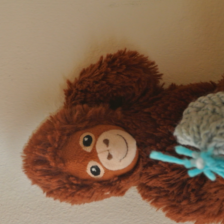

In [13]:
transform(a)

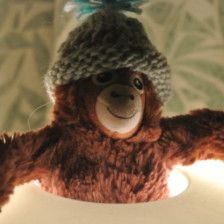

In [14]:
transform(p)

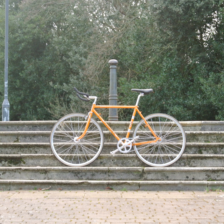

In [15]:
transform(n)